In [3]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Load the churn dataset

churn_data = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/churn_data_st.csv')

In [5]:
# Having a quick look at the dataset

churn_data.head(10)

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,2,Month-to-month,Yes,29.85,29.85,No
1,5575-GNVDE,Male,0,34,4,One year,No,56.95,1889.50,No
2,3668-QPYBK,Male,0,2,4,Month-to-month,Yes,53.85,108.15,Yes
3,7795-CFOCW,Male,0,45,4,One year,No,42.30,1840.75,No
4,9237-HQITU,Female,0,2,2,Month-to-month,Yes,70.70,151.65,Yes
5,9305-CDSKC,Female,0,8,6,Month-to-month,Yes,99.65,820.50,Yes
6,1452-KIOVK,Male,0,22,5,Month-to-month,Yes,89.10,1949.40,No
7,6713-OKOMC,Female,0,10,2,Month-to-month,No,29.75,301.90,No
8,7892-POOKP,Female,0,28,7,Month-to-month,Yes,104.80,3046.05,Yes
9,6388-TABGU,Male,0,62,4,One year,No,56.15,3487.95,No


In [6]:
# Checking unique categories in each feature

churn_data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
tenure                73
ServiceCount           9
Contract               3
PaperlessBilling       2
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64

Null Hypothesis : There is no relation between two categorical values.

Alternate Hypothesis : There is a relation between categorical variables.

Questions:

1. Is there a relationship between users who have churned to their genders?

2. Is there a relationship between users who have churned and to those who have opted for paperless billing?

In [7]:
churn_data['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

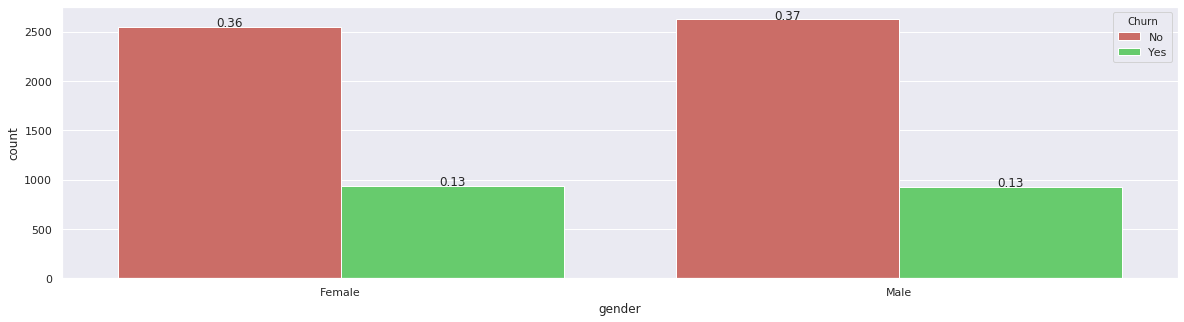

In [11]:
sns.set(style='darkgrid')
sns.set_palette('hls', 3)
fig, ax = plt.subplots(figsize = (20, 5))
ax = sns.countplot(x='gender', hue='Churn', data=churn_data)


for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
           height + 3,
           '{:1.2f}'.format(height/churn_data.shape[0]),
            ha = 'center')

The distribution of both the categories of gender for churn, looks identical, thus indication may not have a significant effect on the target variable "churn". Lets try to prove this using the statistical test - Chi Square.

In [15]:
# Creating a contingency table
gender_churn_ct = pd.crosstab(index=churn_data['gender'], columns=churn_data['Churn'])

In [16]:
gender_churn_ct

Churn,No,Yes
gender,,
Female,2549,939
Male,2625,930


In [18]:
# Getting the first data values.

gender_churn_ct.iloc[0].values

array([2549,  939])

In [21]:
from scipy import stats
(chi2, p, dof,_) = stats.chi2_contingency([gender_churn_ct.iloc[0].values, gender_churn_ct.iloc[1].values])

In [22]:
print('chi2', chi2)
print("p", p)
print("Degree of Freedom", dof)

chi2 0.4840828822091383
p 0.48657873605618596
Degree of Freedom 1


More the value of Chi2, more significant is the feature/variable, Refer to the below chi2 table

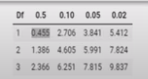

The P value shows, 0.48, which is more than the alpha value = 0.05, which signifies we are failed to reject the null hypothesis, saying the variable is statistically insignificant.

Chi2 Statistics

chi2 = sum((observed - expected)^2/expected) 

Performing chi-square test on 'paperless billing' column.


In [27]:
paperlessbilling_churn_ct = pd.crosstab(index=churn_data['PaperlessBilling'], columns=churn_data['Churn'])

In [28]:
paperlessbilling_churn_ct

Churn,No,Yes
PaperlessBilling,,
No,2403,469
Yes,2771,1400


In [29]:
churn_data['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

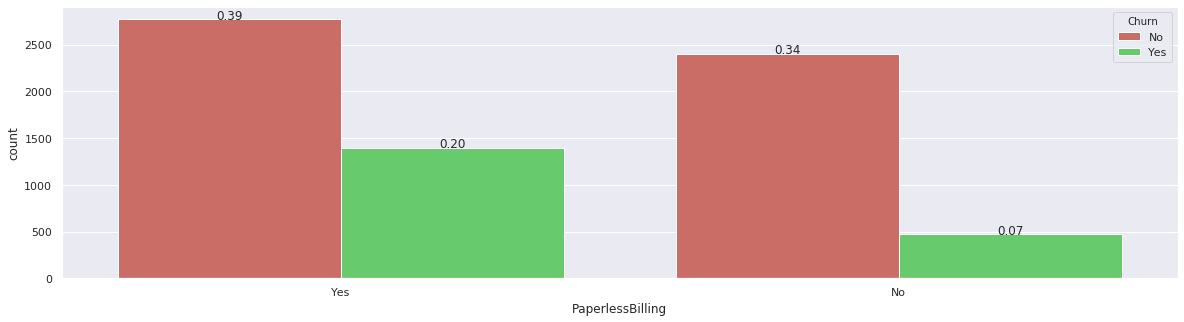

In [30]:
sns.set(style='darkgrid')
sns.set_palette('hls', 3)
fig, ax = plt.subplots(figsize = (20, 5))
ax = sns.countplot(x='PaperlessBilling', hue='Churn', data=churn_data)


for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
           height + 3,
           '{:1.2f}'.format(height/churn_data.shape[0]),
            ha = 'center')

There is a differnece between the data distribution, let's confirm with statistical Chi2 test.

In [33]:
(chi2, p, dof,_) = stats.chi2_contingency([paperlessbilling_churn_ct.iloc[0].values, paperlessbilling_churn_ct.iloc[1].values])

In [32]:
print('chi2', chi2)
print("p", p)
print("Degree of Freedom", dof)

chi2 258.27764906707307
p 4.073354668665985e-58
Degree of Freedom 1


The P value is less and thus proving to be significant, but this can be further processed using the domain knowledge.